<h1 style="text-align: center;">Introduction to Data Science - Assignment 1</h1>
<h3 style="text-align: center;">Name: Hugo Hayashi</h3>
<h3 style="text-align: center;">Student ID: 22446441</h3>



## Question 1


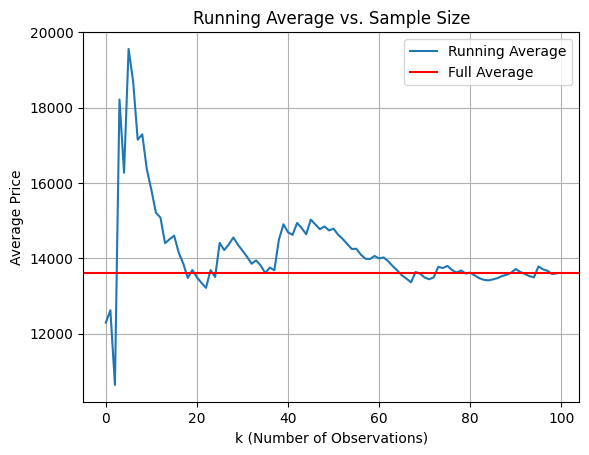

,CarName,price
0,volkswagen dasher,12290.0
1,honda civic,12945.0
2,mitsubishi outlander,6669.0
3,buick century special,40960.0
4,volkswagen 411 (sw),8495.0
...,...,...
95,bmw x5,41315.0
96,maxda glc deluxe,6095.0
97,mitsubishi mirage g4,9959.0
98,chevrolet impala,5151.0


In [25]:
# Your fancy code here
import numpy as np
import pandas as pd
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import seaborn as sns
import requests, zipfile
import io

cpp = pd.read_csv('CarPrice_Assignment.csv')
cppPrice = cpp[['CarName', 'price']]
shuffled_cpp = cppPrice.sample(frac=1).reset_index(drop=True).head(100)

runAvg = []
for k in range(1, 101):
    runAvg.append(shuffled_cpp.iloc[:k]['price'].mean())
fullAvg = shuffled_cpp['price'].mean()
plt.plot(runAvg, label='Running Average')
plt.axhline(fullAvg, color='red', label='Full Average')
plt.xlabel('k (Number of Observations)')
plt.ylabel('Average Price')
plt.title('Running Average vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()
shuffled_cpp

Because of randomness, the running average fluctuates a lot at small values of k, and as k increases, the average becomes more stable and gradually approaches the full-sample mean. This illustrates the Law of Large Numbers, in which the sample average converges to the true population mean as the sample size becomes larger.

## Question 2

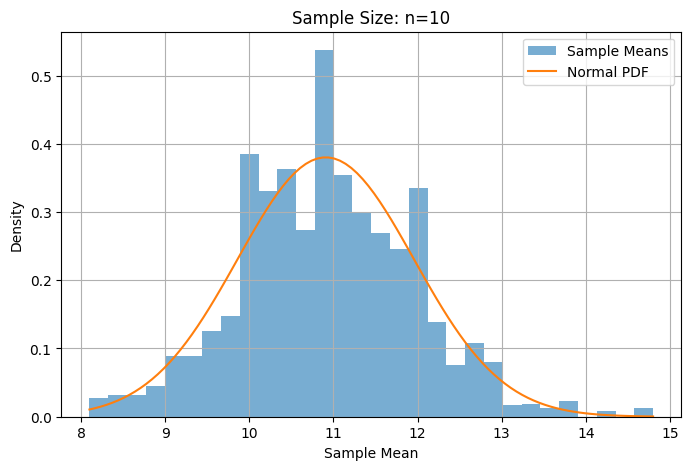

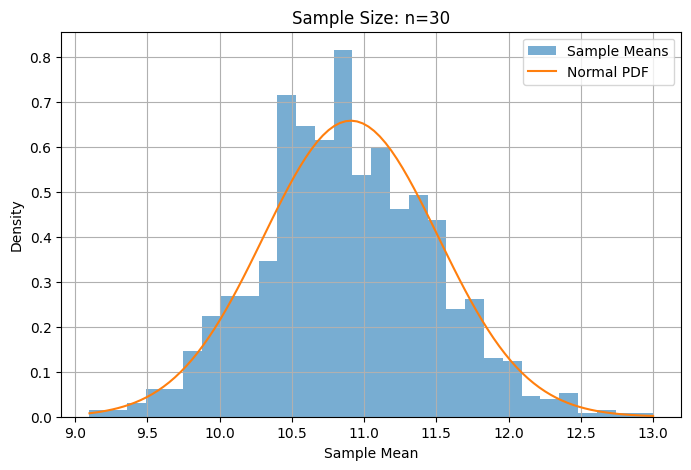

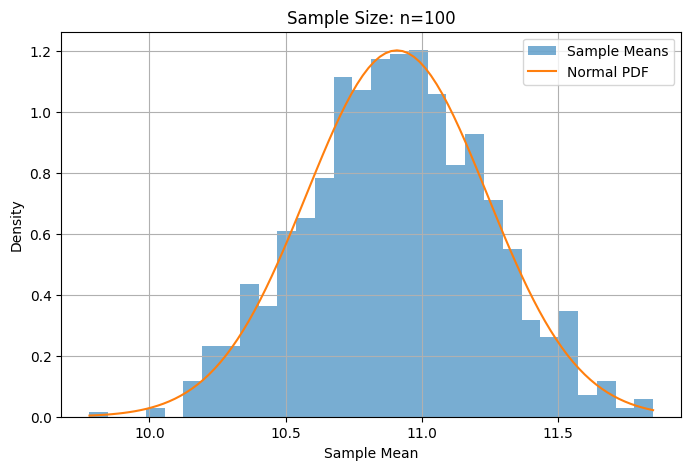

In [3]:
#More code and comments...
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

df = pd.read_csv('student-mat.csv', sep=';')
G1 = df['G1']

mu = G1.mean()
sigma = G1.std()

sample_sizes = [10, 30, 100]
n_samples = 1000

for n in sample_sizes:
    means = []
    for _ in range(n_samples):
        sample = G1.sample(n, replace=True)
        means.append(sample.mean())
    
    means = np.array(means)
    x = np.linspace(min(means), max(means), 100)
    pdf = norm.pdf(x, loc=mu, scale=sigma / np.sqrt(n))

    plt.figure(figsize=(8,5))
    plt.hist(means, bins=30, density=True, alpha=0.6, label='Sample Means')
    plt.plot(x, pdf, label='Normal PDF')
    plt.title(f"Sample Size: n={n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()


For small values of n, such as 10, the histogram looks rough or skewed and not according to the line representing the normal PDF; however, as n increases, the histogram of sample means becomes more symmetric, bell-shaped, and according to the line demonstraing the Central Limit Theorem in which the distribution of sample means approaches a normal distribution as n increases, regardless of the original data shape.

## Question 3

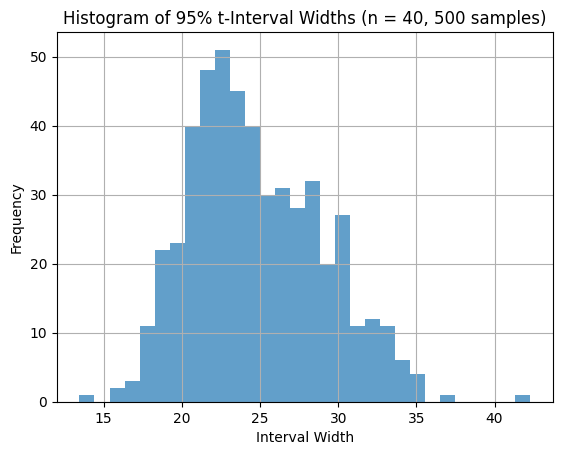

Average interval width: 24.800157086237515


In [5]:
horsepower = cpp['horsepower'].dropna()

n= 40
reps = 500
alpha = 0.05
widths = []

for _ in range(reps):
    sample = horsepower.sample(n, replace=True)
    x_bar = sample.mean()
    s = sample.std(ddof=1)
    t_crit = t.ppf(1 - alpha/2, df=n-1)
    half_width = t_crit * s / np.sqrt(n)
    widths.append(2 * half_width)

plt.hist(widths, bins=30, alpha=0.7)
plt.title("Histogram of 95% t-Interval Widths (n = 40, 500 samples)")
plt.xlabel("Interval Width")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Average interval width:", np.mean(widths))

The histogram shows that most of the 95% t-intervals cluster around the average width, forming a roughly bell-shaped distribution. This indicates that the width of confidence intervals are similar in size.

## Question 4